In [17]:
library(dplyr)
library(ggplot2)

In [5]:
supp_tables_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/neuroseq_ms/supp_tables/"
filename = paste0(supp_tables_dir,"SuppTable2_ncells_per_donor_pool_celltype_condition.csv")
df = read.csv(filename)
head(df)

donor_id,pool_id,time_point,celltype,n_cells,treatment
HPSI0114i-eipl_1,pool1,D11,FPP,1672,NONE
HPSI0114i-eipl_1,pool1,D11,NB,228,NONE
HPSI0114i-eipl_1,pool1,D11,P_FPP,1217,NONE
HPSI0114i-kolf_2,pool12,D11,FPP,334,NONE
HPSI0114i-kolf_2,pool12,D11,NB,16,NONE
HPSI0114i-kolf_2,pool12,D11,P_FPP,190,NONE


In [6]:
df_nb = df[df$celltype == "NB",] %>% group_by(donor_id, pool_id) %>% summarize(nb_cells = sum(n_cells))
df_tot = df %>% group_by(donor_id, pool_id) %>% summarize(total_cells = sum(n_cells))

In [9]:
nrow(df_nb)
head(df_nb,2)
nrow(df_tot)
head(df_tot,2)

[1] 169

donor_id,pool_id,nb_cells
HPSI0114i-eipl_1,pool1,228
HPSI0114i-kolf_2,pool12,16


[1] 252

donor_id,pool_id,total_cells
HPSI0114i-bezi_3,pool10,681
HPSI0114i-eipl_1,pool1,31643


In [11]:
df_fractions = inner_join(df_nb, df_tot)
df_fractions$nb_fraction = df_fractions$nb_cells/df_fractions$total_cells
nrow(df_fractions)
head(df_fractions,2)

Joining, by = c("donor_id", "pool_id")


[1] 169

donor_id,pool_id,nb_cells,total_cells,nb_fraction
HPSI0114i-eipl_1,pool1,228,31643,0.007205385
HPSI0114i-kolf_2,pool12,16,795,0.020125786


In [15]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/iPSC_scanpy/"
filename = paste0(mydir,'Cuomo_cluster_cell_fractions_by_donor_experiment.csv')
df_ipsc = read.csv(filename, row.names = 1)
df_ipsc = df_ipsc[df_ipsc$cluster_id == '2',]
head(df_ipsc)

,donor_long_id,experiment,cluster_id,count,f_cells
92,HPSI0114i-bezi_1,expt_39,2,0,0.00000000
222,HPSI0114i-eipl_1,expt_41,2,81,0.81818182
267,HPSI0114i-iisa_1,expt_24,2,1,0.02564103
452,HPSI0114i-iisa_3,expt_39,2,2,0.05263158
572,HPSI0114i-joxm_1,expt_39,2,23,0.06005222
682,HPSI0114i-kolf_2,expt_37,2,50,0.68493151


In [16]:
df_ipsc$donor_id = df_ipsc$donor_long_id
df_to_plot = inner_join(df_fractions, df_ipsc)
nrow(df_to_plot)
head(df_to_plot)

Joining, by = "donor_id"
Warning message:
“Column `donor_id` joining factors with different levels, coercing to character vector”

[1] 50

donor_id,pool_id,nb_cells,total_cells,nb_fraction,donor_long_id,experiment,cluster_id,count,f_cells
HPSI0114i-eipl_1,pool1,228,31643,0.0072053851,HPSI0114i-eipl_1,expt_41,2,81,0.81818182
HPSI0114i-kolf_2,pool12,16,795,0.0201257862,HPSI0114i-kolf_2,expt_37,2,50,0.68493151
HPSI0114i-wegi_1,pool7,1,1353,0.0007390983,HPSI0114i-wegi_1,expt_37,2,1,0.02777778
HPSI0214i-datg_2,pool9,1,8957,0.0001116445,HPSI0214i-datg_2,expt_33,2,0,0.00000000
HPSI0214i-datg_2,pool9,1,8957,0.0001116445,HPSI0214i-datg_2,expt_34,2,0,0.00000000
HPSI0214i-eiwy_1,pool1,4,2505,0.0015968064,HPSI0214i-eiwy_1,expt_36,2,1,0.04000000


In [20]:
cor.test(df_to_plot$f_cells, df_to_plot$nb_fraction)


	Pearson's product-moment correlation

data:  df_to_plot$f_cells and df_to_plot$nb_fraction
t = 3.5261, df = 48, p-value = 0.0009389
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2005614 0.6498839
sample estimates:
      cor 
0.4535873 


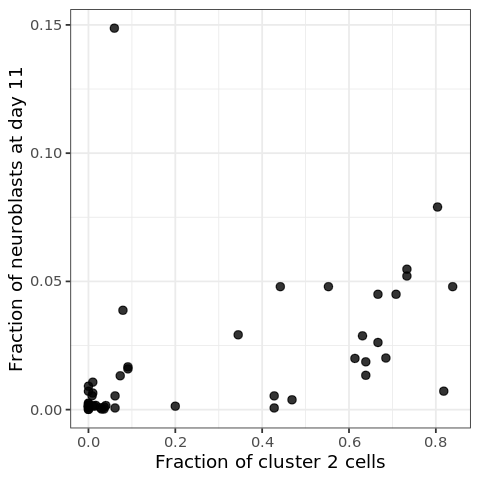

In [24]:
options(repr.plot.width=4, repr.plot.height=4)
ggplot(df_to_plot, aes(x = f_cells, y = nb_fraction)) + 
    geom_point(size = 2, alpha = 0.8) + theme_bw() +
    xlab("Fraction of cluster 2 cells") + ylab("Fraction of neuroblasts at day 11")